# TP1 TRIVA - Louis Montaut

## Introduction

###  Important presets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
file_name = 'images/tools.jpg'

#We need to get the format of the file because python treats png and jpg in a different way !
file_format = file_name[len(file_name)-3]+file_name[len(file_name)-2]+file_name[len(file_name)-1]

In [3]:
def showImages(ImagesArray,name_of_file = '',saveFile = 'false'):
    fig = plt.figure(figsize=(13,13))
    
    n = len(ImagesArray)
    rows = n//2+1
    for i in range(n):
            fig.add_subplot(rows,2,i+1)
            plt.axis('off')
            plt.title(ImagesArray[i][1])
            plt.imshow(ImagesArray[i][0], cmap = plt.get_cmap('gray'))
    plt.show()
    
    if saveFile:
        #Do not forget to add the extension in the name_of_file
        fig.savefig('results/'+name_of_file+'.'+file_format)
    return None

In [4]:
if not os.path.exists("results"):
    os.makedirs("results")

In [5]:
def get_luminance(Irgb):
    return np.dot(Irgb[...,:3], [0.2126, 0.7152, 0.0722])

### RGB Image

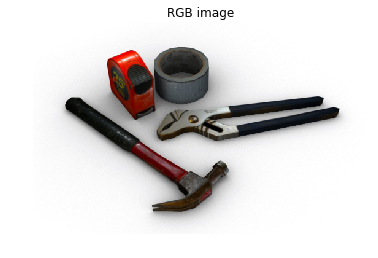

In [6]:
Irgb = mpimg.imread(file_name)
fig = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('RGB image')
imgplot = plt.imshow(Irgb)
plt.show()

### Black and white

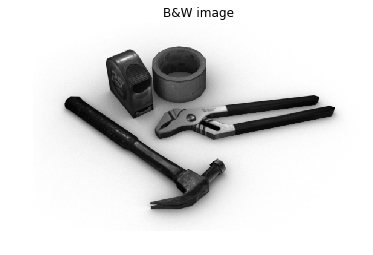

In [7]:
I = get_luminance(Irgb)
showImages([(I,'B&W image')],'black_and_white',True)

## Basic image processing

### Noise

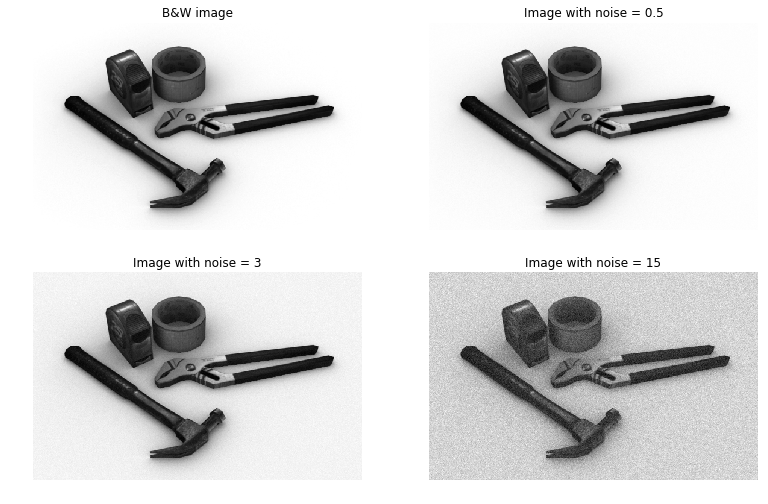

In [20]:
sigma_noise_1 = 0.5
sigma_noise_2 = 3
sigma_noise_3 = 15

n,m = I.shape
I_noise_1 = I + np.random.randn(n,m)*sigma_noise_1
I_noise_2 = I + np.random.randn(n,m)*sigma_noise_2
I_noise_3 = I + np.random.randn(n,m)*sigma_noise_3

showImages([(I,'B&W image'),(I_noise_1,'Image with noise = '+str(sigma_noise_1)),
            (I_noise_2,'Image with noise = '+str(sigma_noise_2)),
            (I_noise_3,'Image with noise = '+str(sigma_noise_3))],'noise',True)

### Gaussian convolution

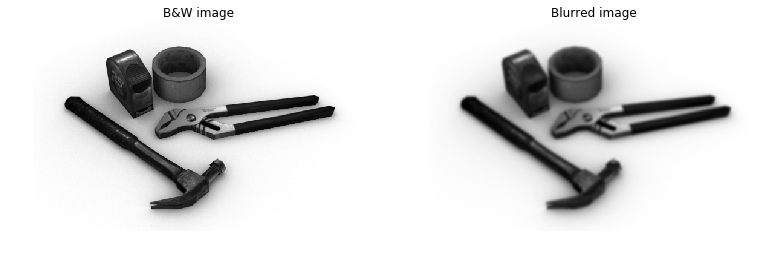

In [9]:
import gaussian_convolution as gc
I_blurred = gc.gaussianConvolution(I,2)

showImages([(I,'B&W image'),(I_blurred,'Blurred image')],'gaussian_convolution',True)

### Gradient

# CHOOSE THE THRESHOLD HERE PLEASE

**Why is there a different threshold depending on jpg or png?**<br>
Because Python doesn't interpret PNG and JPG files the same way. To python, a PNG file has grayscale values between 0 and 1. JPG files have grayscale values between 0 and 255.

In [10]:
threshold = 0.05

if file_format == 'jpg':
    threshold*=255

Here, I made the code so that we can compute the gradient using two techniques.<br>
The first one : **computeGradientNoConvolution** doesn't use kernels to compute the gradient. It just uses the standard finite differences.<br>
The second one : **computeGradient** uses convolution to compute the gradient.

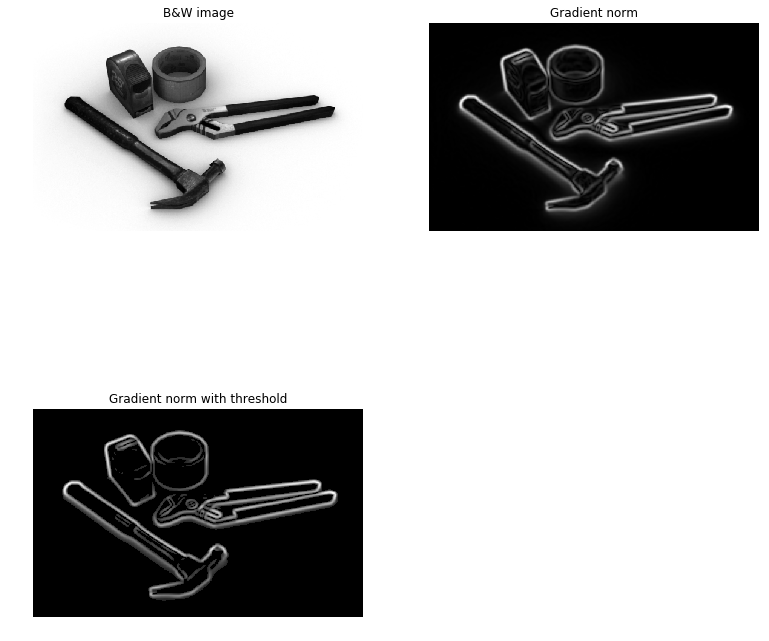

In [11]:
from gradient import computeGradient, computeGradientNoConvolution

I_gradient = computeGradientNoConvolution(I_blurred)
#I_gradient = computeGradient(I_blurred)
dIx,dIy,dI_norm,dI_orientation = I_gradient.dIx,I_gradient.dIy,I_gradient.dI_norm,I_gradient.dI_orientation

n,m = dI_norm.shape
dI_norm_threshold = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        if dI_norm[i,j]>threshold:
            dI_norm_threshold[i,j]=dI_norm[i,j]
        
            
showImages([(I,'B&W image'),(dI_norm,'Gradient norm'),(dI_norm_threshold,'Gradient norm with threshold')],
           'gradient_norm',True)

## Canny Edge Detector

### Quantify Gradient

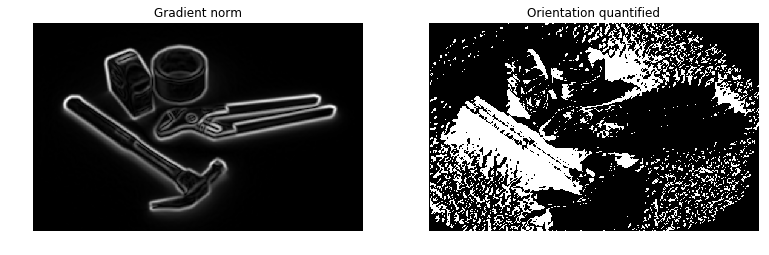

In [12]:
from quantify_gradient import quantifyGradient
I_quantified_gradient = quantifyGradient(dI_orientation)

orientation = 4

n,m = I_quantified_gradient.shape
I_orientation = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        if I_quantified_gradient[i,j] == orientation:
            I_orientation[i,j] = 1
        else :
            I_orientation[i,j] = 0
            

showImages([(dI_norm,'Gradient norm'),(I_orientation,'Orientation quantified')],'orientation',True)
            

### Non-max Suppression

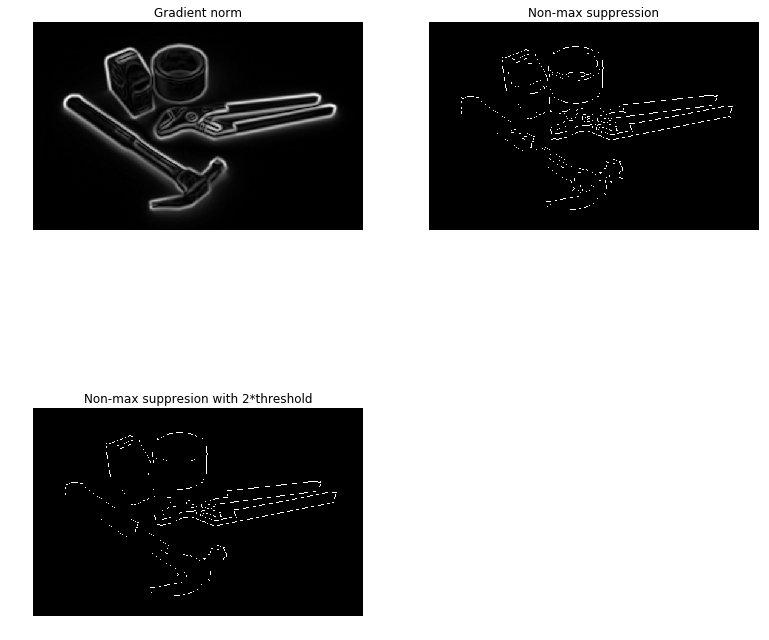

In [13]:
from non_max_supression import nms
I_nms_1 = nms(dI_norm, I_quantified_gradient, threshold)
I_nms_2 = nms(dI_norm, I_quantified_gradient, threshold*2)

showImages([(dI_norm,'Gradient norm'),(I_nms_1,'Non-max suppression'),
            (I_nms_2,'Non-max suppresion with 2*threshold')],'Non_max_suppresion',True)

### Canny Edges Detector

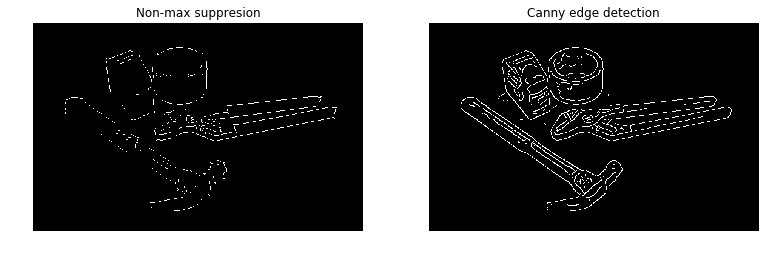

In [14]:
from canny_edges import cannyEdges
sigma = 2
t1 = 0.07
t2 = 0.002

if file_format == 'jpg':
    t1*=255
    t2*=255

Edges = cannyEdges(I,sigma,t1,t2)
I_nms = nms(dI_norm, I_quantified_gradient, t1)

showImages([(I_nms,'Non-max suppresion'),(Edges,'Canny edge detection')],'canny_edge',True)